In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from datetime import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [2]:
train=ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('../input/rome-weather-classification/Rome Weather',target_size=(200,200),batch_size=3,class_mode='binary')

Found 250 images belonging to 5 classes.


In [4]:
train_dataset.class_indices

{'Cloudy': 0, 'Foggy': 1, 'Rainy': 2, 'Snowy': 3, 'Sunny': 4}

In [5]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [6]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  
                                  tf.keras.layers.Dense(5,activation='softmax')
                                  
                                 ])

2022-06-29 10:11:47.916676: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

In [8]:
start_time=datetime.now()
model_fit=model.fit(train_dataset,steps_per_epoch=3,epochs=150)
end_time=datetime.now()
print(end_time-start_time)

2022-06-29 10:11:48.528595: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
3/3 [==============================] - 1s 166ms/step - loss: 21.9491 - sparse_categorical_accuracy: 0.3333
Epoch 2/150
3/3 [==============================] - 0s 151ms/step - loss: 14.3761 - sparse_categorical_accuracy: 0.2222
Epoch 3/150
3/3 [==============================] - 0s 123ms/step - loss: 7.2138 - sparse_categorical_accuracy: 0.2222
Epoch 4/150
3/3 [==============================] - 0s 119ms/step - loss: 5.3752 - sparse_categorical_accuracy: 0.2222
Epoch 5/150
3/3 [==============================] - 0s 125ms/step - loss: 2.1796 - sparse_categorical_accuracy: 0.0000e+00
Epoch 6/150
3/3 [==============================] - 0s 121ms/step - loss: 1.8295 - sparse_categorical_accuracy: 0.3333
Epoch 7/150
3/3 [==============================] - 0s 121ms/step - loss: 1.5959 - sparse_categorical_accuracy: 0.4444
Epoch 8/150
3/3 [==============================] - 0s 130ms/step - loss: 1.4422 - sparse_categorical_accuracy: 0.2222
Epoch 9/150
3/3 [==============================] -

In [9]:
model.evaluate(train_dataset)

84/84 [==============================] - 2s 24ms/step - loss: 0.1095 - sparse_categorical_accuracy: 0.9840


[0.10945790261030197, 0.984000027179718]

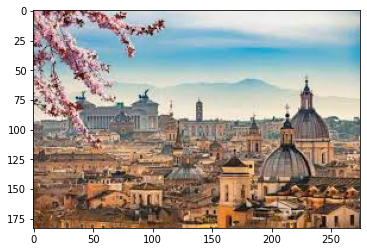

In [10]:
whether_img=plt.imread("../input/images/roam2.jpg")
plt.imshow(whether_img)
plt.show()

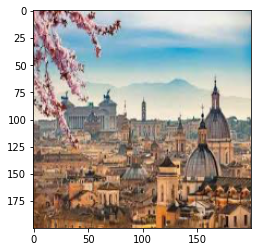

In [11]:
whether_img=cv.resize(whether_img,(200,200))
plt.imshow(whether_img)
plt.show()

In [12]:
whether_img.shape

(200, 200, 3)

In [13]:
whether_img=whether_img.reshape(200,200,3)

In [14]:
whether_img.shape

(200, 200, 3)

In [15]:
x=image.img_to_array(whether_img)
x=np.expand_dims(x,axis=0)

In [16]:
model.predict(x)

array([[0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
whether=['Cloudy', 'Foggy', 'Rainy', 'Snowy', 'Sunny']
pridicted_whether=whether[np.argmax(model.predict(x)[0])]
pridicted_whether

'Sunny'

in this way our model can predict accuretly